In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

In [2]:
# Load Sample 100+ Dataset
Train=pd.read_csv("Datasets/health/train_labels.csv")
Train_Beneficiarydata=pd.read_csv("Datasets/health/train_beni_sample.csv")
Train_Inpatientdata=pd.read_csv("Datasets/health/train_inpatient_sample.csv")
Train_Outpatientdata=pd.read_csv("Datasets/health/train_outpatient_sample.csv")


# # Load Train Dataset
# Train=pd.read_csv("./input/Train-1542865627584.csv")
# Train_Beneficiarydata=pd.read_csv("./input/Train_Beneficiarydata-1542865627584.csv")
# Train_Inpatientdata=pd.read_csv("./input/Train_Inpatientdata-1542865627584.csv")
# Train_Outpatientdata=pd.read_csv("./input/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset
# Test=pd.read_csv("./input/Test-1542969243754.csv")
# Test_Beneficiarydata=pd.read_csv("./input/Test_Beneficiarydata-1542969243754.csv")
# Test_Inpatientdata=pd.read_csv("./input/Test_Inpatientdata-1542969243754.csv")
# Test_Outpatientdata=pd.read_csv("./input/Test_Outpatientdata-1542969243754.csv")

In [3]:
## Lets Check Shape of datasets 

print('Shape of Train data :',Train.shape) # potential fraud by provider
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape) # beneficiary data
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape) # inpatient data
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape) # outpatient data

# print('Shape of Test data :',Test.shape)
# print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
# print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
# print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)


In [4]:
df_inpatient = pd.merge(Train_Beneficiarydata, Train_Inpatientdata, on='BeneID', how='left')
df_inpatient_fraud = pd.merge(df_inpatient, Train, on='Provider', how='left')
df_inpatient_fraud.dropna(subset=['PotentialFraud'], inplace=True)
df_inpatient_fraud.reset_index(drop=True, inplace=True)

In [5]:
print(Train_Beneficiarydata.shape)
print(Train_Inpatientdata.shape)
print(Train.shape)
print(df_inpatient.shape)
print(df_inpatient_fraud.shape)

df_inpatient_fraud.head()

(138556, 25)
(40474, 30)
(5410, 2)
(147741, 54)
(40474, 55)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No
2,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No


In [6]:
print(df_inpatient_fraud.keys())

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'Cl

In [7]:
df_inpatient_fraud.dtypes

BeneID                              object
DOB                                 object
DOD                                 object
Gender                               int64
Race                                 int64
RenalDiseaseIndicator               object
State                                int64
County                               int64
NoOfMonths_PartACov                  int64
NoOfMonths_PartBCov                  int64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
IPAnnualReimbursementAmt             int64
IPAnnualDeductibleAmt                int64
OPAnnualRei

In [8]:
df_inpatient_fraud['AdmissionDt'] = pd.to_datetime(df_inpatient_fraud['AdmissionDt']).dt.date
df_inpatient_fraud['AdmissionDt'] = df_inpatient_fraud['AdmissionDt'].astype('datetime64')
df_inpatient_fraud['DischargeDt'] = pd.to_datetime(df_inpatient_fraud['DischargeDt']).dt.date
df_inpatient_fraud['DischargeDt'] = df_inpatient_fraud['DischargeDt'].astype('datetime64')
df_inpatient_fraud['Gender'] = df_inpatient_fraud['Gender'].astype('category')
df_inpatient_fraud['Race'] = df_inpatient_fraud['Race'].astype('category')
df_inpatient_fraud['State'] = df_inpatient_fraud['State'].astype('category')
df_inpatient_fraud['County'] = df_inpatient_fraud['County'].astype('category')
df_inpatient_fraud['PotentialFraud'] = df_inpatient_fraud['PotentialFraud'].astype('category')
df_inpatient_fraud['PotentialFraudCode'] = df_inpatient_fraud['PotentialFraud'].cat.codes

df_inpatient_fraud.dtypes

BeneID                                     object
DOB                                        object
DOD                                        object
Gender                                   category
Race                                     category
RenalDiseaseIndicator                      object
State                                    category
County                                   category
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                       int64
ChronicCond_Heartfailure                    int64
ChronicCond_KidneyDisease                   int64
ChronicCond_Cancer                          int64
ChronicCond_ObstrPulmonary                  int64
ChronicCond_Depression                      int64
ChronicCond_Diabetes                        int64
ChronicCond_IschemicHeart                   int64
ChronicCond_Osteoporasis                    int64
ChronicCond_rheumatoidarthritis             int64


In [9]:
def calc_fraud_agg_by_columns(df, columns):
    dict_fraud_agg = {}
    
    df_temp = df.groupby(columns)['PotentialFraud'].value_counts().unstack().fillna(0)
    
    for row in df_temp.iterrows():
        count_yesno = row[1]['No'] + row[1]['Yes']
        count_yes = row[1]['Yes']
        fraud_ratio = count_yes / count_yesno
        dict_fraud_agg[row[0]] = [count_yesno, count_yes, fraud_ratio]
        for i, _ in enumerate(columns):
            dict_fraud_agg[row[0]].insert(i, row[i])
    
    new_columns = columns.copy()
    new_columns.append('count_cases')
    new_columns.append('count_fraud_cases')
    new_columns.append('ratio_fraud_cases')
    return pd.DataFrame.from_dict(dict_fraud_agg, orient='index', columns=new_columns).reset_index(drop=True)
    
df_fraud_DiagnosisGroupCode = calc_fraud_agg_by_columns(df_inpatient_fraud, ['DiagnosisGroupCode'])
df_fraud_DiagnosisGroupCode.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)

print(df_fraud_DiagnosisGroupCode.shape)
print(df_fraud_DiagnosisGroupCode.head(100))

(736, 4)
    DiagnosisGroupCode  count_cases  count_fraud_cases  ratio_fraud_cases
637                843            6                  6           1.000000
640                846            5                  5           1.000000
95                 124            4                  4           1.000000
89                 113            3                  3           1.000000
91                 115            2                  2           1.000000
..                 ...          ...                ...                ...
251                328           64                 43           0.671875
250                327           75                 50           0.666667
480                620           63                 42           0.666667
388                495           48                 32           0.666667
63                 078           45                 30           0.666667

[100 rows x 4 columns]


In [10]:
def draw_line_plot(df, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10,10), dpi=80)
    sns.catplot(kind="bar", data=df, x=x, y=y)
    
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [11]:
df_inpatient_fraud['HospitalizationPeriod'] = df_inpatient_fraud.apply(lambda x : x['DischargeDt'] - x['AdmissionDt'], axis=1)
df_inpatient_fraud['HospitalizationPeriod'] = df_inpatient_fraud['HospitalizationPeriod'].astype('timedelta64[D]')
df_inpatient_fraud['HospitalizationPeriodRange'] = df_inpatient_fraud['HospitalizationPeriod'] # .apply(lambda x : math.floor(x/10) * 10)
df_inpatient_fraud['HospitalizationPeriodRange'] = df_inpatient_fraud['HospitalizationPeriodRange'].astype('category')
df_inpatient_fraud[['HospitalizationPeriod', 'HospitalizationPeriodRange']].head(10)

,HospitalizationPeriod,HospitalizationPeriodRange
0,6.0,6.0
1,2.0,2.0
2,3.0,3.0
3,8.0,8.0
4,17.0,17.0
5,6.0,6.0
6,5.0,5.0
7,4.0,4.0
8,3.0,3.0
9,7.0,7.0


In [12]:
df_inpatient_fraud['Age'] = df_inpatient_fraud['DOB'].apply(lambda x : 2022 - int(x[0:4]))
df_inpatient_fraud['AgeRange'] = df_inpatient_fraud['Age'].apply(lambda x : math.floor(x/10) * 10)
df_inpatient_fraud['AgeRange'] = df_inpatient_fraud['AgeRange'].astype('category')
df_inpatient_fraud[['Age', 'AgeRange']].head(10)

,Age,AgeRange
0,79,70
1,79,70
2,79,70
3,108,100
4,84,80
5,82,80
6,83,80
7,81,80
8,78,70
9,76,70


In [13]:
df_inpatient_fraud[['PotentialFraudCode', 'Age', 'HospitalizationPeriod']].corr()

,PotentialFraudCode,Age,HospitalizationPeriod
PotentialFraudCode,1.000000,0.003149,0.015996
Age,0.003149,1.000000,-0.005491
HospitalizationPeriod,0.015996,-0.005491,1.000000


In [14]:
df_inpatient_fraud.keys()

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'Cl

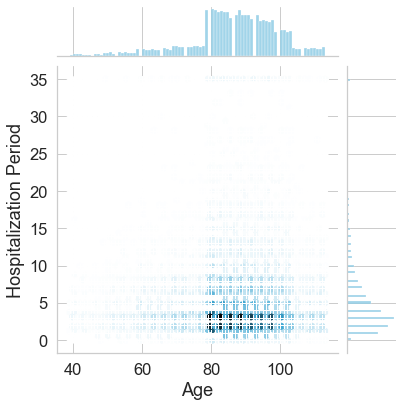

In [15]:
g = sns.jointplot(x="Age", y="HospitalizationPeriod", data=df_inpatient_fraud[['Age', 'HospitalizationPeriod', 'PotentialFraudCode']], kind="hex", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.set_axis_labels("Age", "Hospitalization Period")
plt.show()

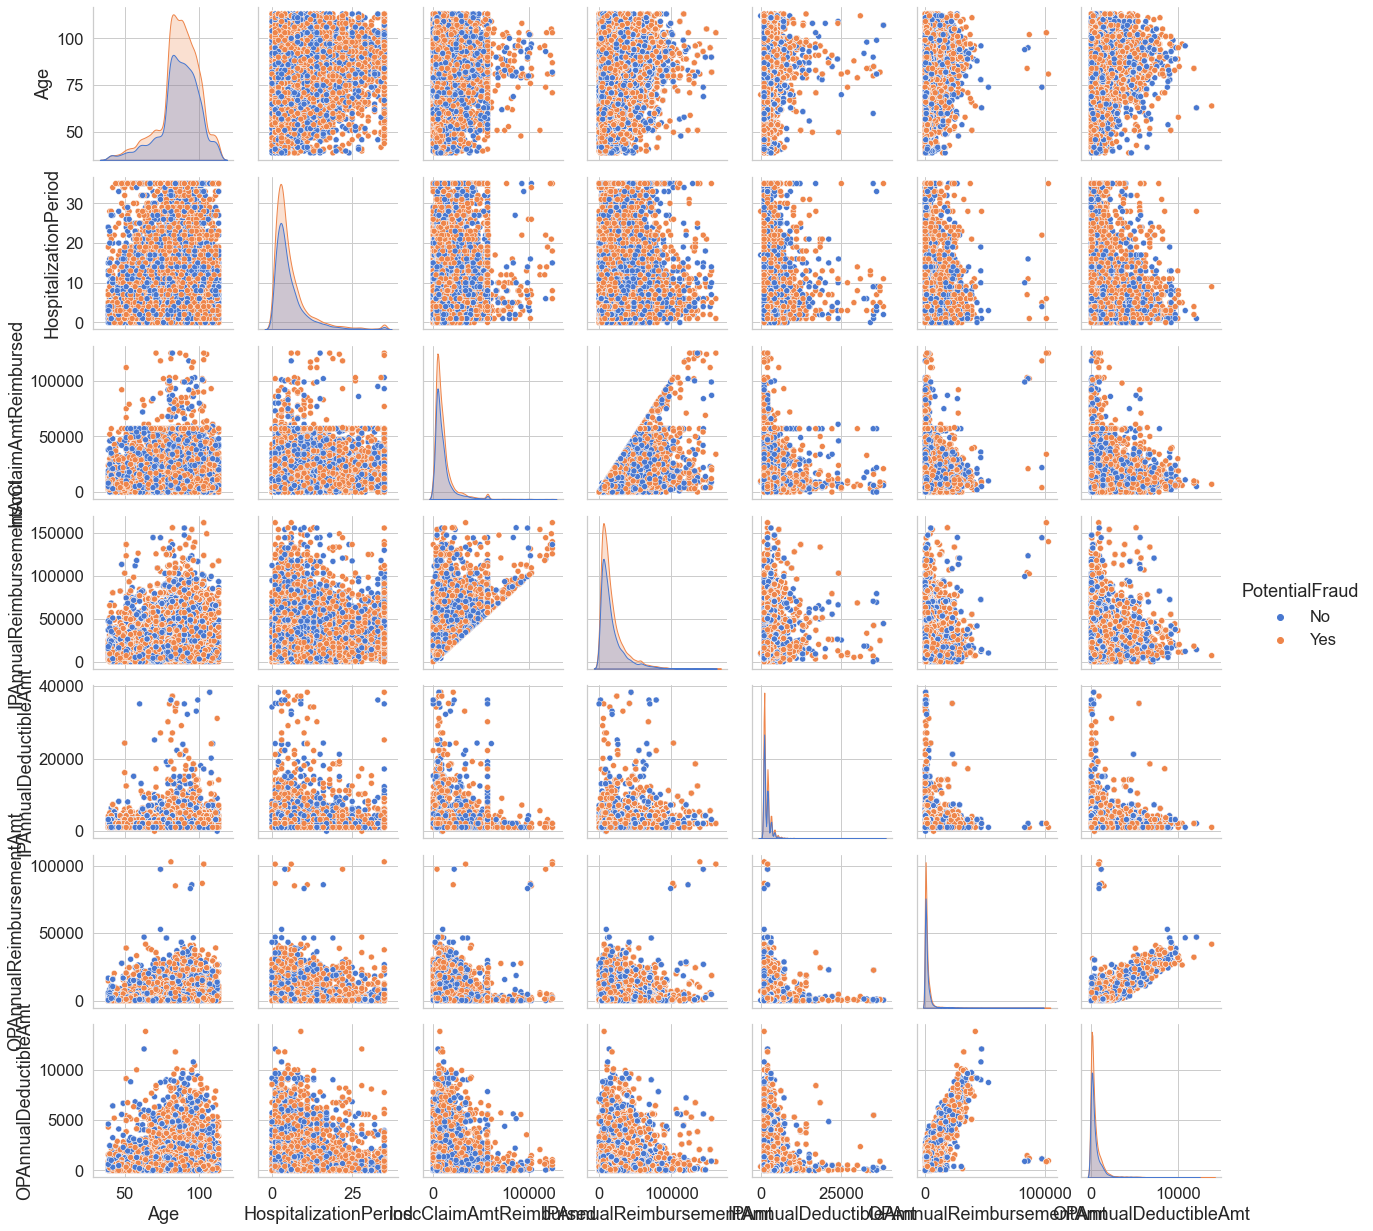

In [16]:
sns.pairplot(df_inpatient_fraud[['Age', 'HospitalizationPeriod', 'InscClaimAmtReimbursed', 
                                 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
                                 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 
                                 'PotentialFraud']], hue="PotentialFraud") 
plt.show()

In [17]:
def drawCorrellogram(df):
    columns = df.columns.tolist()
    df_temp = df[columns]
    
    # Plot
    plt.figure(figsize=(12,12), dpi=80)
    sns.set(font_scale=0.9)
    sns.heatmap(df_temp.corr(), xticklabels=df_temp.corr().columns, yticklabels=df_temp.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.show()

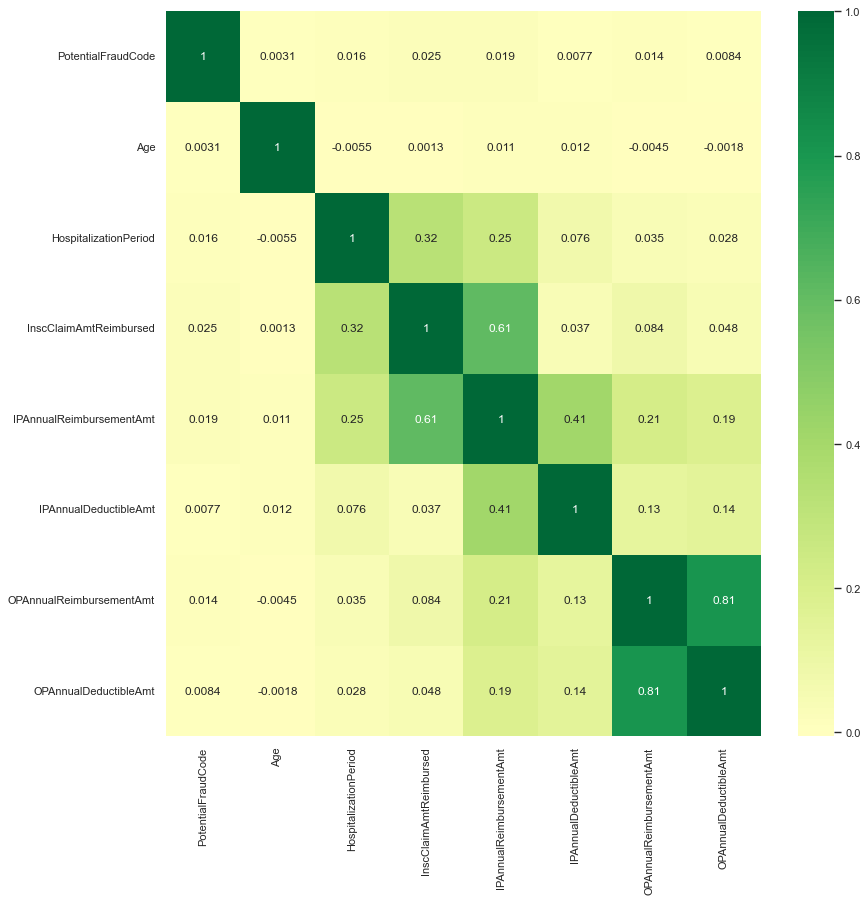

In [18]:
drawCorrellogram(df_inpatient_fraud[['PotentialFraudCode', 'Age', 'HospitalizationPeriod', 'InscClaimAmtReimbursed', 
                                 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
                                 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']])

In [19]:
df_outpatient = pd.merge(Train_Beneficiarydata, Train_Outpatientdata, on='BeneID', how='left')
df_outpatient_fraud = pd.merge(df_outpatient, Train, on='Provider', how='left')
df_outpatient_fraud.dropna(subset=['PotentialFraud'], inplace=True)
df_outpatient_fraud.reset_index(drop=True, inplace=True)

In [20]:
df_outpatient_fraud['ClaimStartDt'] = pd.to_datetime(df_outpatient_fraud['ClaimStartDt']).dt.date
df_outpatient_fraud['ClaimStartDt'] = df_outpatient_fraud['ClaimStartDt'].astype('datetime64')
df_outpatient_fraud['ClaimEndDt'] = pd.to_datetime(df_outpatient_fraud['ClaimEndDt']).dt.date
df_outpatient_fraud['ClaimEndDt'] = df_outpatient_fraud['ClaimEndDt'].astype('datetime64')
df_outpatient_fraud['Gender'] = df_outpatient_fraud['Gender'].astype('category')
df_outpatient_fraud['Race'] = df_outpatient_fraud['Race'].astype('category')
df_outpatient_fraud['State'] = df_outpatient_fraud['State'].astype('category')
df_outpatient_fraud['County'] = df_outpatient_fraud['County'].astype('category')
df_outpatient_fraud['ClmAdmitDiagnosisCode'] = df_outpatient_fraud['ClmAdmitDiagnosisCode'].astype('category')
df_outpatient_fraud['PotentialFraud'] = df_outpatient_fraud['PotentialFraud'].astype('category')
df_outpatient_fraud['PotentialFraudCode'] = df_outpatient_fraud['PotentialFraud'].cat.codes

In [21]:
df_outpatient_fraud['Age'] = df_outpatient_fraud['DOB'].apply(lambda x : 2022 - int(x[0:4]))
df_outpatient_fraud['AgeRange'] = df_outpatient_fraud['Age'].apply(lambda x : math.floor(x/10) * 10)
df_outpatient_fraud['AgeRange'] = df_outpatient_fraud['AgeRange'].astype('category')
df_outpatient_fraud[['Age', 'AgeRange']].head(10)

,Age,AgeRange
0,86,80
1,86,80
2,86,80
3,100,100
4,100,100
5,100,100
6,100,100
7,100,100
8,100,100
9,100,100


In [22]:
df_outpatient_fraud['ClaimPeriod'] = df_outpatient_fraud.apply(lambda x : x['ClaimEndDt'] - x['ClaimStartDt'], axis=1)
df_outpatient_fraud['ClaimPeriod'] = df_outpatient_fraud['ClaimPeriod'].astype('timedelta64[D]')
df_outpatient_fraud['ClaimPeriodRange'] = df_outpatient_fraud['ClaimPeriod'].apply(lambda x : math.floor(x/2) * 2)
df_outpatient_fraud['ClaimPeriodRange'] = df_outpatient_fraud['ClaimPeriodRange'].astype('category')
df_outpatient_fraud[['ClaimPeriod', 'ClaimPeriodRange']].head(10)

,ClaimPeriod,ClaimPeriodRange
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,20.0,20
9,12.0,12


In [23]:
df_outpatient_fraud.keys()

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10

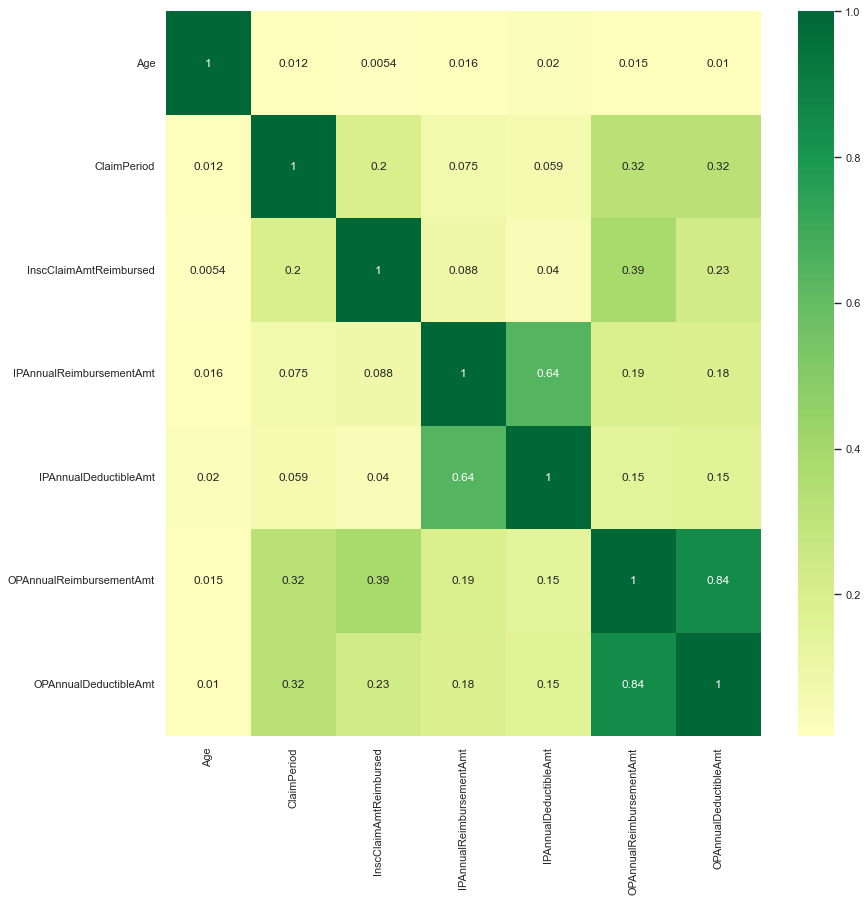

In [24]:
drawCorrellogram(df_outpatient_fraud[df_outpatient_fraud['PotentialFraudCode']==1][['Age', 'ClaimPeriod', 'InscClaimAmtReimbursed', 
                                 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
                                 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']])